<a href="https://colab.research.google.com/github/ariG23498/ft-pali-gemma/blob/main/notebooks/paligemma_inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# @title Setup and Imports
!pip install -U -q transformers

from transformers import (
    PaliGemmaForConditionalGeneration,
    PaliGemmaProcessor
)
import torch
import requests
from PIL import Image
from matplotlib import pyplot as plt
from IPython.display import display, HTML

device = "cuda" if torch.cuda.is_available() else "cpu"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 582.8 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 30.8 MB/s eta 0:00:00


In [ ]:
# @title Getting Model from Hugging Face 🤗
model_id = "google/paligemma-3b-mix-224" # @param {"type":"string","placeholder":"google/paligemma-3b-mix-224"}

model = PaliGemmaForConditionalGeneration.from_pretrained(
    model_id,
    torch_dtype=torch.bfloat16
)
model = model.to(device)
processor = PaliGemmaProcessor.from_pretrained(model_id)

config.json:   0%|          | 0.00/1.03k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/paligemma/configuration_paligemma.py:137: FutureWarning: The `vocab_size` attribute is deprecated and will be removed in v4.44, Please use `text_config.vocab_size` instead.
  warnings.warn(


model.safetensors.index.json:   0%|          | 0.00/62.6k [00:00<?, ?B/s]

model-00001-of-00003.safetensors:   0%|          | 0.00/4.95G [00:00<?, ?B/s]

model-00002-of-00003.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00003-of-00003.safetensors:   0%|          | 0.00/1.74G [00:00<?, ?B/s]

`config.hidden_act` is ignored, you should use `config.hidden_activation` instead.
Gemma's activation function will be set to `gelu_pytorch_tanh`. Please, use
`config.hidden_activation` if you want to override this behaviour.
See https://github.com/huggingface/transformers/pull/29402 for more details.


Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/137 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/699 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/40.0k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/4.26M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.5M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/24.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/607 [00:00<?, ?B/s]

In [ ]:
# @title Input Image and Prompt

image_url = "https://huggingface.co/datasets/ritwikraha/random-storage/resolve/main/cohen.jpeg" # @param {"type":"string","placeholder":"cohen.jpeg"}
prompt = "who is the person?" # @param {"type":"string","placeholder":"enter your prompt"}
image = Image.open(requests.get(image_url, stream=True).raw)

In [ ]:
inputs = processor(
    text=prompt,
    images=image,
    padding="longest",
    do_convert_rgb=True,
    return_tensors="pt"
).to(device=device, dtype=model.dtype)

with torch.no_grad():
    output = model.generate(
        **inputs,
        max_length=496
    )

output = processor.decode(
    output[0],
    skip_special_tokens=True
)

In [ ]:
# @title Utility for displaying VQA
# Function to display the contents
def display_content(prompt, image, output_text):
    # Display prompt
    display(HTML(f"<h2>🙋‍♂️ {prompt}</h2>"))

    # Display image
    plt.figure(figsize=(6,6))
    plt.imshow(image)
    plt.axis('off')
    plt.show()

    # Display output text
    output_text = output_text.split(prompt)[1]
    display(HTML(f"<h2>🤖 {output_text}</h3>"))

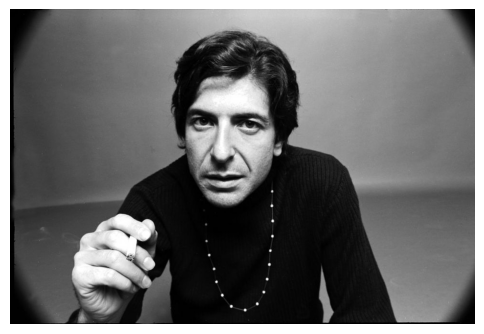

In [ ]:
display_content(prompt, image, output)